In [1]:
import mne
from mne import concatenate_raws
from mne.channels import make_standard_montage
%matplotlib inline

In [2]:
from pathlib import Path
subjectsdir = Path('/home/toedtli/Tinnitus/Data/data_dublin/subjects')
gap_data=subjectsdir/'20035/EEG/gapdetection'
fnames = list(gap_data.glob('*'))
paradigm='gapdetection'

raws = [mne.io.read_raw_bdf(fname) for fname in fnames if str(fname).endswith(".bdf")]
raw = concatenate_raws(raws)

Extracting EDF parameters from /home/toedtli/Tinnitus/Data/data_dublin/subjects/20035/EEG/gapdetection/20035_ses-1_gappost.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/toedtli/Tinnitus/Data/data_dublin/subjects/20035/EEG/gapdetection/20035_ses-1_gap8.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/toedtli/Tinnitus/Data/data_dublin/subjects/20035/EEG/gapdetection/20035_ses-1_gapbbn.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


# Resampling Tests (just as an illustration for noobs like me)

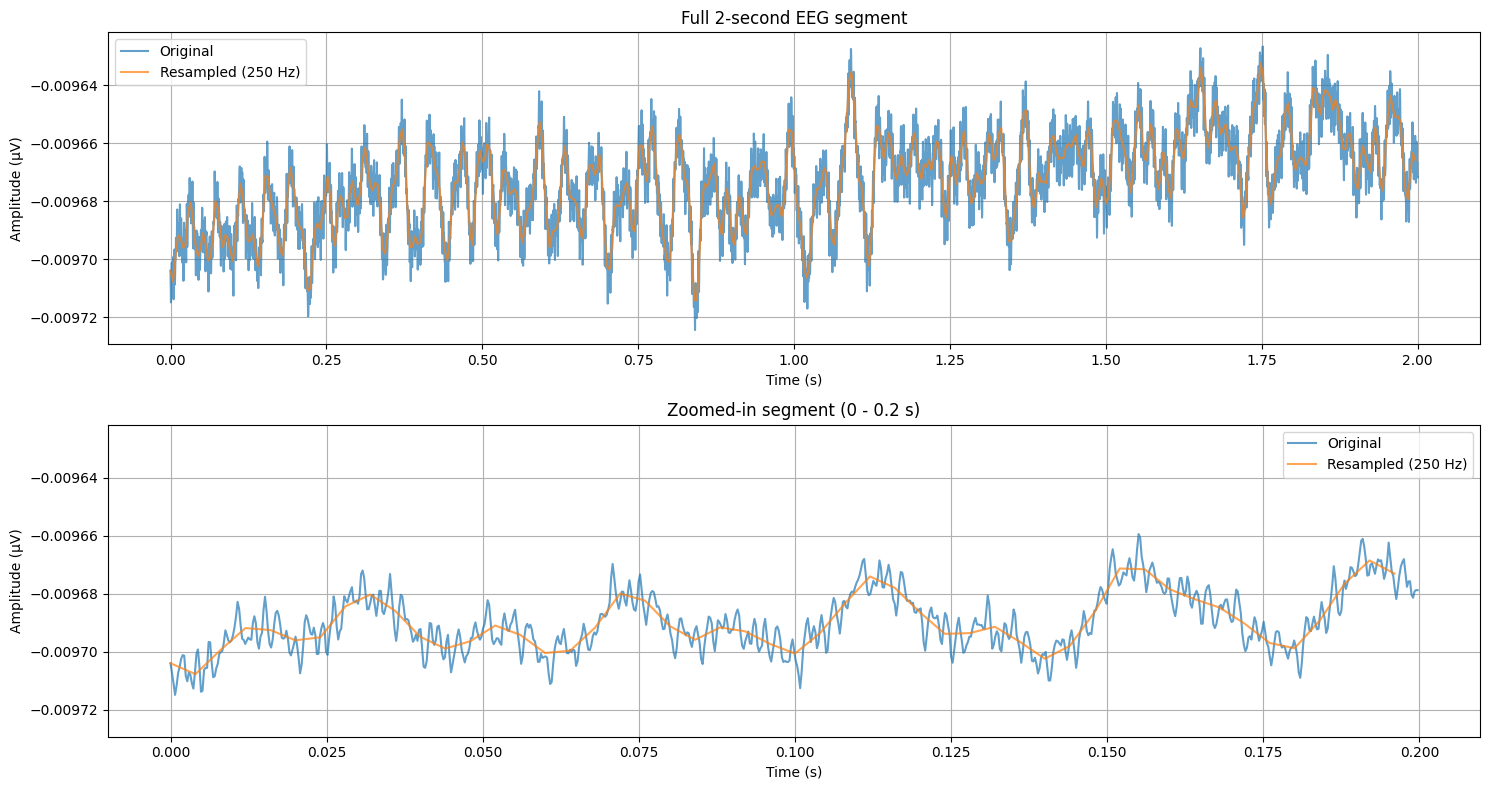

In [3]:
import matplotlib.pyplot as plt
#The signals should look very similar — maybe slightly smoother after resampling. 
#That’s expected! You’re keeping the important low-frequency info and tossing the unnecessary high-frequency detail.

#If you zoom in (e.g. plot just 0–0.2 sec), you’ll really notice the difference in sampling density.
# Copy original raw and resample a separate copy
raw_orig = raw.copy().pick('Cz')  # Replace 'Cz' with a valid EEG channel
raw_resampled = raw.copy().pick('Cz').resample(sfreq=250)

# Extract a 2-second window for comparison
# Define time window in seconds
t_start = 0
t_stop = 2

# Get correct sample indices for both datasets
start_orig, stop_orig = raw_orig.time_as_index([t_start, t_stop])
start_res, stop_res = raw_resampled.time_as_index([t_start, t_stop])

# Extract data and times from both datasets
data_orig, times_orig = raw_orig[:, start_orig:stop_orig]
data_resampled, times_resampled = raw_resampled[:, start_res:stop_res]



# Zoom window: first 200 ms (0 to 0.2 s)
zoom_start_orig, zoom_stop_orig = raw_orig.time_as_index([0, 0.2])
# Zoom window: first 200 ms (0 to 0.2 s)
zoom_start_res, zoom_stop_res = raw_resampled.time_as_index([0, 0.2])

zoom_data_orig = data_orig[:, :zoom_stop_orig - zoom_start_orig]
zoom_times_orig = times_orig[:zoom_stop_orig - zoom_start_orig]

zoom_data_resampled = data_resampled[:, :zoom_stop_res - zoom_start_res]
zoom_times_resampled = times_resampled[:zoom_stop_res - zoom_start_res]


# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 8), sharey=True)

# Plot full 2 seconds
axs[0].plot(times_orig, data_orig.T, label='Original', alpha=0.7)
axs[0].plot(times_resampled, data_resampled.T, label='Resampled (250 Hz)', alpha=0.7)
axs[0].set_title('Full 2-second EEG segment')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude (µV)')
axs[0].legend()
axs[0].grid(True)

# Plot zoomed-in segment
axs[1].plot(zoom_times_orig, zoom_data_orig.T, label='Original', alpha=0.7)
axs[1].plot(zoom_times_resampled, zoom_data_resampled.T, label='Resampled (250 Hz)', alpha=0.7)
axs[1].set_title('Zoomed-in segment (0 - 0.2 s)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude (µV)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()

Effective window size : 0.500 (s)
Effective window size : 8.192 (s)


/tmp/ipykernel_26283/3791273870.py:20: RuntimeWarning: divide by zero encountered in log10
  psd_db_orig = 10 * np.log10(psd_data_orig.ravel())
/tmp/ipykernel_26283/3791273870.py:21: RuntimeWarning: divide by zero encountered in log10
  psd_db_resampled = 10 * np.log10(psd_data_res.ravel())


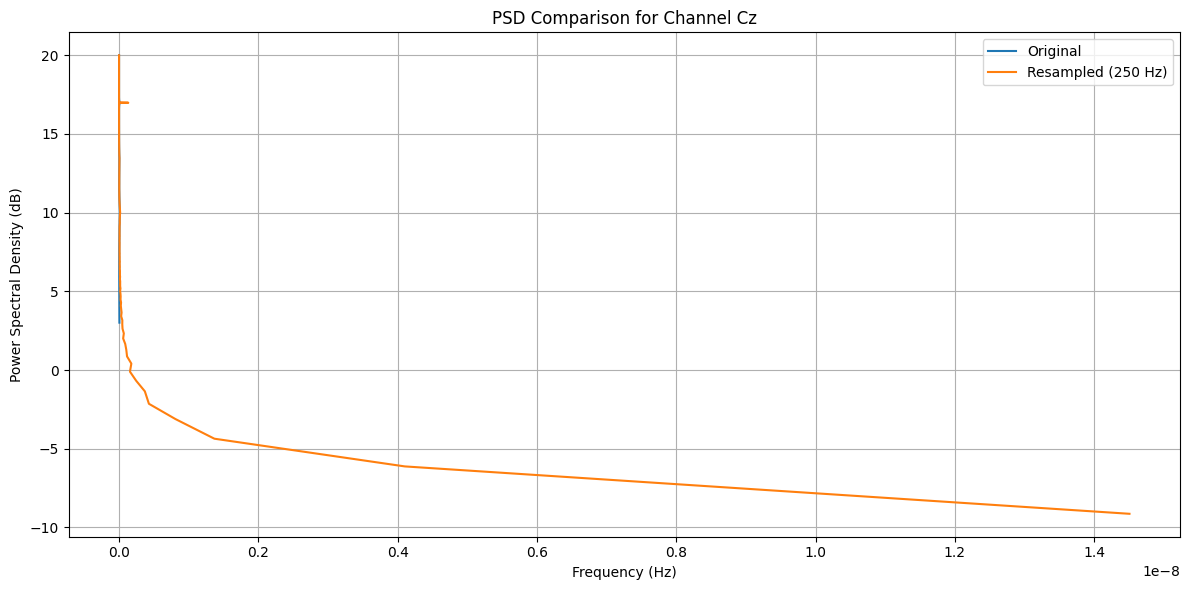

In [4]:
import matplotlib.pyplot as plt
import numpy as np

channel = 'Cz'  # Replace with valid one in your dataset

# Pick just that one channel early
raw_orig = raw.copy().pick([channel])
raw_resampled = raw.copy().pick([channel]).resample(250)

# Compute PSD
psd_orig = raw_orig.compute_psd(fmax=100)
psd_resampled = raw_resampled.compute_psd(fmax=100)

# Get data
freqs_orig, psd_data_orig = psd_orig.get_data(return_freqs=True)
freqs_res, psd_data_res = psd_resampled.get_data(return_freqs=True)

# Each get_data() returns shape: (n_channels=1, n_freqs)
# Just use [0] or .ravel() to flatten
psd_db_orig = 10 * np.log10(psd_data_orig.ravel())
psd_db_resampled = 10 * np.log10(psd_data_res.ravel())
freqs_orig = freqs_orig.ravel()
freqs_res = freqs_res.ravel()
# Plot
plt.figure(figsize=(12, 6))
plt.plot(freqs_orig, psd_db_orig, label='Original')
plt.plot(freqs_res, psd_db_resampled, label='Resampled (250 Hz)')
plt.title(f'PSD Comparison for Channel {channel}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
raw.plot_psd(picks="eeg", fmin=0.1, fmax=120,);

In [5]:
#no useful annotations given- so clearly we don't extract events from annotations
for i in range(len(raws)):
    print(fnames[i])
    display(raws[i].annotations.to_data_frame())

/home/toedtli/Tinnitus/Data/data_dublin/subjects/20035/EEG/gapdetection/20035_ses-1_gappost.bdf


,onset,duration,description
0,2025-04-03 16:39:51,0.0,BAD boundary
1,2025-04-03 16:39:51,0.0,EDGE boundary
2,2025-04-03 16:56:42,0.0,BAD boundary
3,2025-04-03 16:56:42,0.0,EDGE boundary


/home/toedtli/Tinnitus/Data/data_dublin/subjects/20035/EEG/gapdetection/20035_ses-1_gap8.bdf


,onset,duration,description


/home/toedtli/Tinnitus/Data/data_dublin/subjects/20035/EEG/gapdetection/20035_ses-1_gapbbn.bdf


,onset,duration,description


In [6]:
raw.drop_channels(['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'])
montage = make_standard_montage("easycap-M1")
raw.load_data()
raw.set_montage(montage=montage, match_case=False, on_missing="warn")

Reading 0 ... 10063871  =      0.000 ...  2457.000 secs...


<RawEDF | 20035_ses-1_gappost.bdf, 65 x 10063872 (2457.0 s), ~4.87 GiB, data loaded>

In [7]:
raw.resample(sfreq=250, stim_picks=None)
if not paradigm=='rest':
    l_freq, h_freq = 1, 40
raw.filter(picks="eeg", l_freq=l_freq, h_freq=h_freq)
raw.set_eeg_reference("average", projection=True)
raw.apply_proj()

Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
727 events found on stim channel Status
Event IDs: [    1     2     3     5     6     7    10    11 65536]
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
727 events found on stim channel Status
Event IDs: [    1     2     3     5     6     7    10    11 65536]
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


<RawEDF | 20035_ses-1_gappost.bdf, 65 x 614250 (2457.0 s), ~304.7 MiB, data loaded>

In [8]:
','.join(raw.ch_names)

'Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,FC3,FC1,C1,C3,C5,T7,TP7,CP5,CP3,CP1,P1,P3,P5,P7,P9,PO7,PO3,O1,Iz,Oz,POz,Pz,CPz,Fpz,Fp2,AF8,AF4,AFz,Fz,F2,F4,F6,F8,FT8,FC6,FC4,FC2,FCz,Cz,C2,C4,C6,T8,TP8,CP6,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2,Status'

0.0        604127
5.0          2700
1.0          2697
3.0          2693
65536.0       341
2.0           341
7.0           339
10.0          338
11.0          338
6.0           336
Name: count, dtype: int64

Index([  3475,   3476,   3477,   3478,   3479,   3480,   3481,   3482,   3483,
         3484,
       ...
       612883, 612884, 612885, 612886, 612887, 612888, 612889, 612890, 612891,
       612892],
      dtype='int64', length=9782)

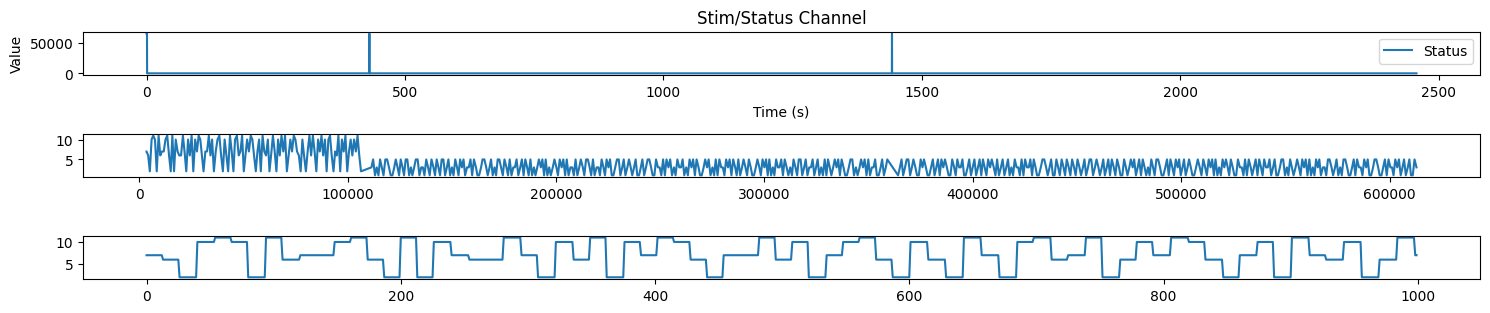

In [9]:
# I don't understand this plot yet. 
raw2 = raw.copy()
raw2.pick(['Status']).get_data()  # selects only the Status channel
#raw.plot()
import matplotlib.pyplot as plt

status_data = raw2.copy().pick('Status').get_data()[0]  # Get 1D array
times = raw2.times  # Time vector

plt.figure(figsize=(15, 3))
plt.subplot(3,1,1)
plt.plot(times, status_data, label='Status')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Stim/Status Channel')
plt.legend()
plt.tight_layout()
plt.subplot(3,1,2)
import pandas as pd
ser = pd.Series(status_data)
display(ser.value_counts()) #lots of zeros- the above plot doesn't show anything interesting
ser[(ser!=0.0) & (ser < 60000)].plot() #undersampled- you won't see the actual trigger value sequence
plt.subplot(3,1,3)
ser2 = ser[(ser!=0.0) & (ser < 60000)]
plt.plot(ser2.iloc[:1000].values)
#pd.Series(ser2.index).plot() #small hicks because we removed the 65536-value
ser2.index

In [10]:
from mne import find_events

events = find_events(raw, stim_channel='Status', shortest_event=1, verbose=True)
events

Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
727 events found on stim channel Status
Event IDs: [    1     2     3     5     6     7    10    11 65536]


array([[  3475,      0,      7],
       [  4251,      0,      6],
       [  5050,      0,      2],
       ...,
       [611077,      0,      1],
       [611939,      0,      5],
       [612880,      0,      3]], shape=(727, 3))

In [11]:
raw.pick_types(eeg=True)  # Only pick EEG channels

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<RawEDF | 20035_ses-1_gappost.bdf, 64 x 614250 (2457.0 s), ~300.0 MiB, data loaded>

In [12]:
import numpy as np
np.unique(events[:,2])
np.unique(events[:, 2], return_counts=True)

(array([    1,     2,     3,     5,     6,     7,    10,    11, 65536]),
 array([200,  25, 200, 200,  25,  25,  25,  25,   2]))

In [13]:
gap_events = events[events[:, 2] == 1]  # Gap only
pulse_events = events[events[:, 2] == 3]  # Pulse only
gap_pulse_events = events[events[:, 2] == 5]  # Gap + Pulse
event_id = {'Gap': 1, 'Pulse': 3, 'Gap+Pulse': 5}

In [56]:
epochs = mne.Epochs(
    raw.pick_types(eeg=True),  # Only pick EEG channels
    events=events,
    event_id=event_id,
    tmin=-0.05,
    tmax=0.25,
    baseline=(None, 0),
    preload=True,
)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Not setting metadata
600 matching events found
Setting baseline interval to [-0.048, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 600 events and 75 original time points ...
0 bad epochs dropped


In [57]:
#this rejects all epochs :D
"""
## drop and save epochs
from autoreject import AutoReject

automatic_epoch_rejection='ptp'
if not automatic_epoch_rejection == False:
    if automatic_epoch_rejection == "ptp":
        reject = dict(eeg=40e-6)
        flat = dict(eeg=1e-7)
        epochs.drop_bad(reject=reject, flat=flat)

    if automatic_epoch_rejection == "autoreject":
        ar = AutoReject()
        ar.fit(epochs_eo)
        epochs_eo = ar.transform(epochs_eo)
""";

In [67]:
gap_epochs = epochs['Gap'].copy()
pulse_epochs = epochs['Pulse'].copy()
gap_pulse_epochs = epochs['Gap+Pulse'].copy()
Fpz_gap_epochs = gap_epochs.pick(['Fpz']).copy()
Fpz_pulse_epochs = pulse_epochs.pick(['Fpz']).copy()
Fpz_gap_pulse_epochs = gap_pulse_epochs.pick(['Fpz']).copy()
gap_epochs = epochs['Gap'].copy()
pulse_epochs = epochs['Pulse'].copy()
gap_pulse_epochs = epochs['Gap+Pulse'].copy()
gap_epochs.drop_channels(['Fpz']) #This one seems to ruin the following plots:
pulse_epochs.drop_channels(['Fpz'])
gap_pulse_epochs.drop_channels(['Fpz']);

Need more than one channel to make topography for eeg. Disabling interactivity.


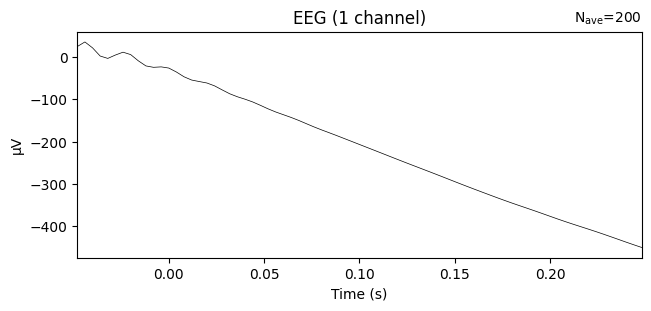

Need more than one channel to make topography for eeg. Disabling interactivity.


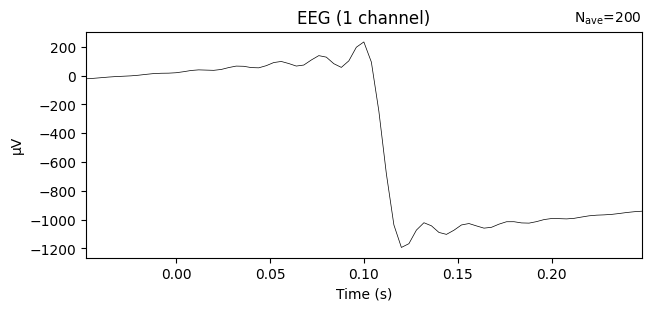

Need more than one channel to make topography for eeg. Disabling interactivity.


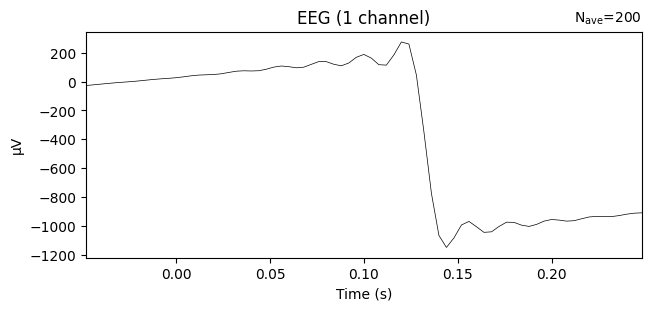

In [69]:
Fpz_gap_epochs.average().plot();
Fpz_pulse_epochs.average().plot();
Fpz_gap_pulse_epochs.average().plot();

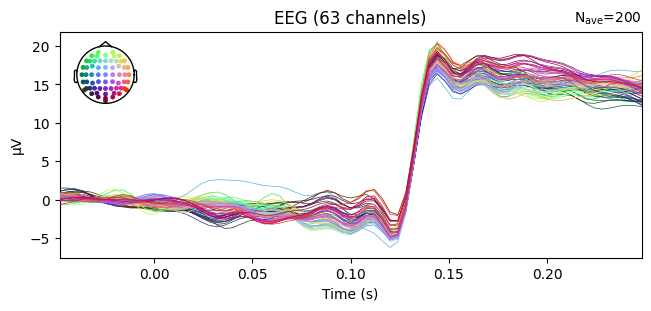

In [63]:
gap_pulse_epochs.average().plot();

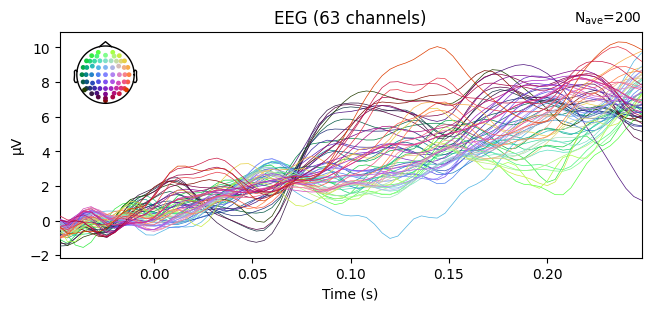

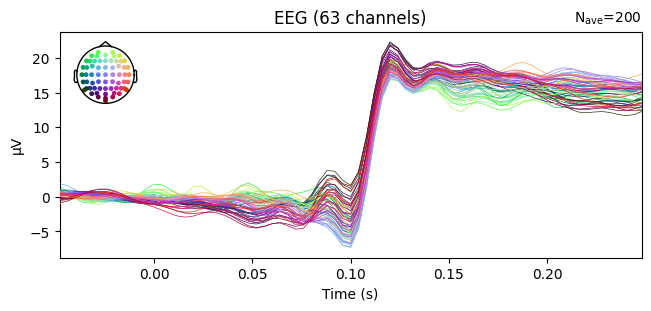

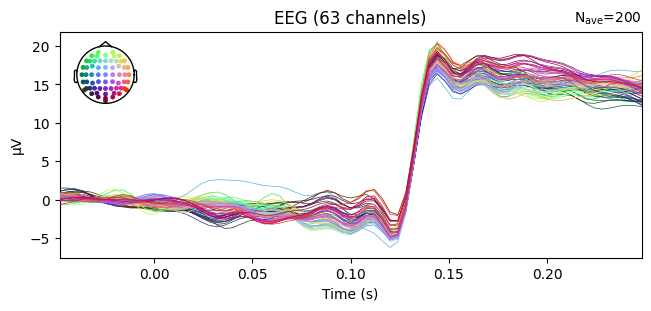

In [62]:
gap_epochs.average().plot();
pulse_epochs.average().plot();
gap_pulse_epochs.average().plot();

In [ ]:
# Compute evoked responses
gap_evoked = gap_epochs.average()
pulse_evoked = pulse_epochs.average()
gap_pulse_evoked = gap_pulse_epochs.average()

# Plot them together for comparison
mne.viz.plot_compare_evokeds(
    {'Gap': gap_evoked, 'Pulse': pulse_evoked, 'Gap+Pulse': gap_pulse_evoked},
    picks='Cz',  # Or pick a channel you like
    combine='mean'
)


In [19]:
%matplotlib inline
raw.plot(duration=20.0, n_channels=80, picks="eeg", scalings=dict(eeg=40e-6), block=True)
raw.interpolate_bads();

Using qt as 2D backend.
Channels marked as bad:
none
Setting channel interpolation method to {'eeg': 'spline'}.


/tmp/ipykernel_26283/4064627078.py:3: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads();


In [20]:
run_ica=True
manual_ica_removal=False
if run_ica:
    from mne.preprocessing import ICA
    from mne_icalabel import label_components

    ica = ICA(n_components=0.95, max_iter=800, method='infomax', fit_params=dict(extended=True))
    try:
        ica.fit(raw)
    except:
        ica = ICA(n_components=5, max_iter=800, method='infomax', fit_params=dict(extended=True))
        ica.fit(raw)

    if manual_ica_removal:
        gui = label_ica_components(raw, ica, block=True)
        eog_indices = ica.labels_["eog"]

    else:
        ic_dict = label_components(raw, ica, method="iclabel")
        ic_labels = ic_dict["labels"]
        ic_probs = ic_dict["y_pred_proba"]
        eog_indices = [idx for idx, label in enumerate(ic_labels) \
                        if label == "eye blink" and ic_probs[idx] > 0.70]

    if len(eog_indices) > 0:
        eog_components = ica.plot_properties(raw,
                                            picks=eog_indices,
                                            show=False,
                                            )
        eog_indices_fil = [x for x in eog_indices if x <= 10]
        ica.apply(raw, exclude=eog_indices_fil)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA to data using 64 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 5 components
Computing Extended Infomax ICA
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 17.8s.


/tmp/ipykernel_26283/1279267779.py:19: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_dict = label_components(raw, ica, method="iclabel")
/tmp/ipykernel_26283/1279267779.py:19: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_dict = label_components(raw, ica, method="iclabel")


# calculate evoked response

In [70]:
gap_evoked = gap_epochs.average()
pulse_evoked = pulse_epochs.average()
gap_pulse_evoked = gap_pulse_epochs.average()

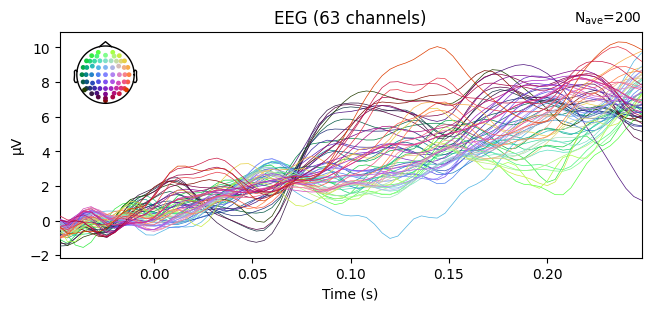

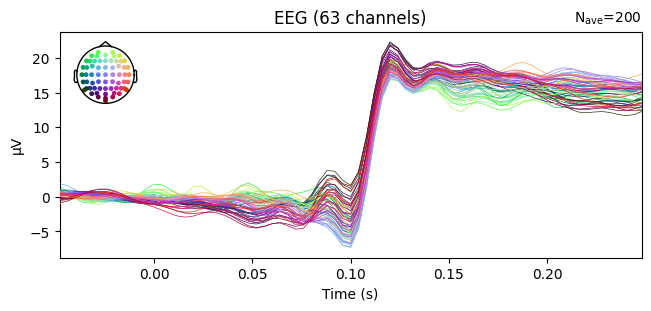

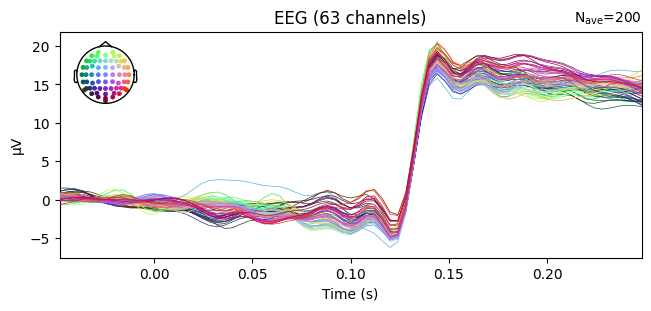

In [71]:
gap_evoked.plot()
pulse_evoked.plot()
gap_pulse_evoked.plot();

# 🔍 1. Compare conditions visually

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


/tmp/ipykernel_26283/811679232.py:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(


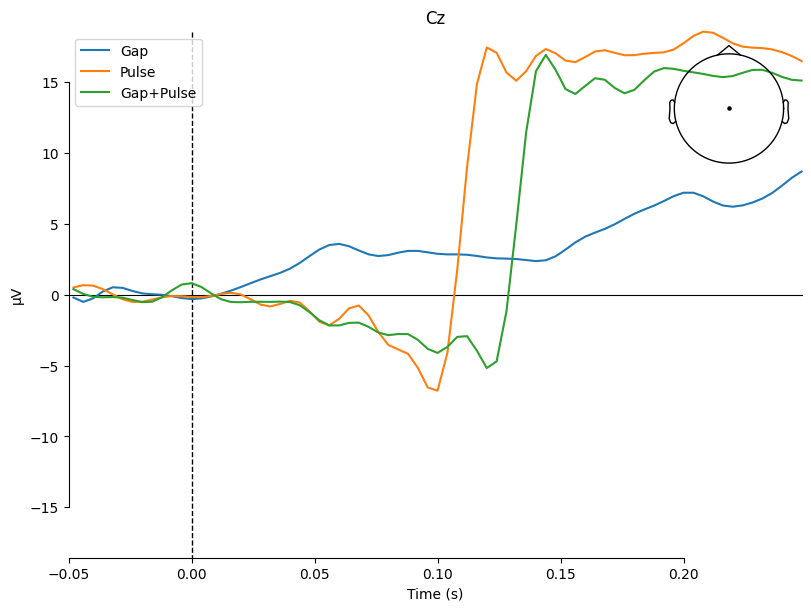

[<Figure size 800x600 with 2 Axes>]

In [121]:
# Compute evoked responses
gap_evoked = gap_epochs.average()
pulse_evoked = pulse_epochs.average()
gap_pulse_evoked = gap_pulse_epochs.average()

# Plot them together for comparison
mne.viz.plot_compare_evokeds(
    {'Gap': gap_evoked, 'Pulse': pulse_evoked, 'Gap+Pulse': gap_pulse_evoked},
    picks='Cz',  # Or pick a channel you like
    combine='mean'
)


# 🧠 2. Look at topographical maps (scalp distribution)

# 📊 3. Difference waves (subtraction)

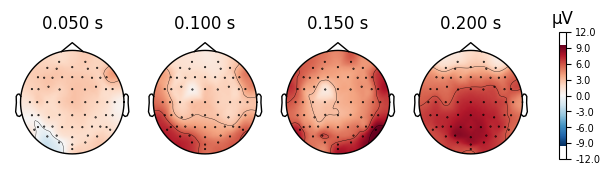

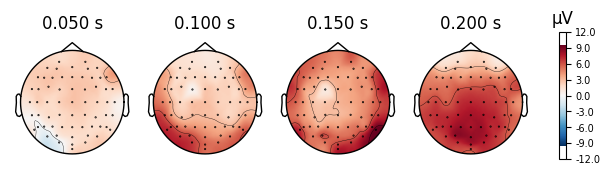

In [74]:
gap_evoked.plot_topomap(times=[0.05, 0.1, 0.15, 0.2], ch_type='eeg')

Gap+Pulse minus Pulse


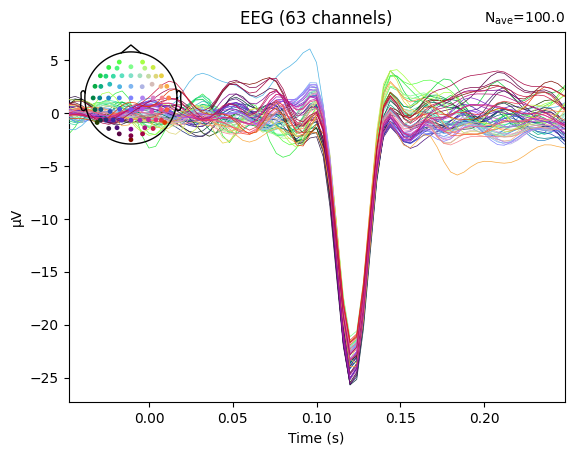

In [123]:
# Gap+Pulse minus Pulse
gp_minus_p = combine_evoked([gap_pulse_evoked, pulse_evoked], weights=[1, -1]);


print('Gap+Pulse minus Pulse')
fig,axes = plt.subplots(1,1)
gp_minus_p.plot(axes=axes)  # Plot first
f = gp_minus_g.plot(axes=axes)  # Plot first


Gap+Pulse minus Gap


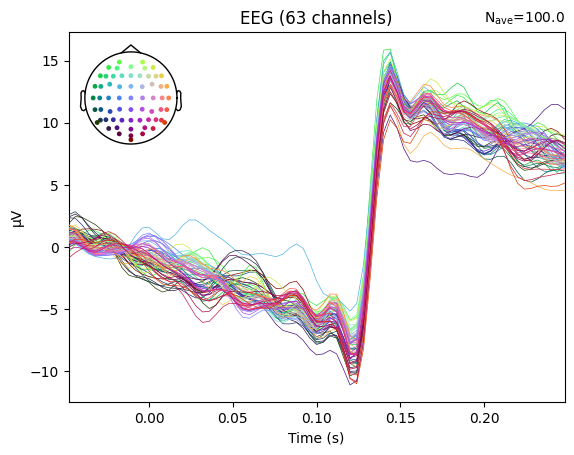

In [124]:
print('Gap+Pulse minus Gap')
gp_minus_g = combine_evoked([gap_pulse_evoked, gap_evoked], weights=[1, -1])
fig,axes = plt.subplots(1,1)
f = gp_minus_g.plot(axes=axes)  # Plot first
